In [1]:
library(tidyverse)
library(ggplot2)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Ethereum

Hier werden alle Etherum Daten zusammengefügt

## News

### Sentiment

In [2]:
ethereum_news_sentiment = read.csv2("./Data/NewsSentiment/Sentinment_Ethereum.csv", sep=";")
head(ethereum_news_sentiment)

headline                                                    
1 Can Ethereum Drop Lower? • Benzinga Crypto                  
2 How to Stake Ethereum to Earn Passive Income 2024 • Benzinga
3 Does Ethereum Have a Capped Supply? - Benzinga              
4 Is Ethereum Classic (ETC) Dead? • Benzinga Crypto           
5 Ethereum (ETH) Price Prediction • 2024 to 2030 • Benzinga   
6 Is Ethereum Here to Stay? • Benzinga Cryptocurrency         
  description                                                                                                                               
1 Ethereum has been on a decline thus far in 2022, yet some investors are still bullish on the digital asset. Can it drop lower?            
2 Far too many Ethereum investors miss out on fantastic passive income by not learning how to stake Ethereum. Find out today!               
3 Does Ethereum have a cap on its total supply, like Bitcoin has a cap of 21 million? What are the implications of such caps?               
4 Ethereum Classic is the original version of Ethereum; the old blockchain still holds loyal supporters but is ultimately a dead blockchain.
5 Trying to find an Ethereum price prediction? Here are 8 ETH price predictions from AI technology and expert analysts from 2022 to 2030.   
6 The future of Ethereum examined –– will Ethereum survive over the long term? Is Ethereum really here to stay?                             
  url              date       sentiment.positive sentiment.negative
1 www.benzinga.com 2022-02-14 0.45               0.23              
2 www.benzinga.com 2022-07-13 0.54               0.18              
3 www.benzinga.com 2022-04-05 0.46               0.31              
4 www.benzinga.com 2022-05-25 0.44               0.34              
5 www.benzinga.com 2022-10-13 0.39               0.34              
6 www.benzinga.com 2022-05-06 0.61               0.17              
  sentiment.neutral
1 0.32             
2 0.28             
3 0.23             
4 0.22             
5 0.28             
6 0.21

In [3]:
ethereum_news_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())%>%
    head()

sentiment menge
1 neg        469 
2 pos       1509

In [4]:
ethereum_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(sentiment = mean(sentiment)) -> ethereum_news_sentiment_w

In [5]:
ethereum_news_sentiment_w %>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())%>%
    head()

sentiment menge
1 neg         2  
2 pos       108

In [6]:
ethereum_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(date) %>%
    summarise(sentiment = mean(sentiment)) -> ethereum_news_sentiment_d

In [7]:
ethereum_news_sentiment_d %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())

sentiment menge
1 neg        82  
2 pos       580

### Menge

In [8]:
ethereum_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    group_by(week = cut(date, "week")) %>%
    summarise(menge = n()) -> ethereum_news_menge_w

## Comments

### Sentiment

In [9]:
ethereum_comment_sentiment = read.csv2("./Data/CommentsSentiment/Sentinment_Ethereum.csv", sep=";")
head(ethereum_comment_sentiment)

headline                                                                                                                                                                                                                                                                                                                   
1 ..operating with omar ras hlda at lG, sap 4 4 739 72 731 38 have change my life I earn $17,360 in 3 days with my minimum mount of $2,200 thank you so much..  2727272727272727272727272727282727282727282828282282823727272727272727227722727272727272727272727282828822828287228282828282828282838282828282828282828383839
2 Still new .  Looking for a mentor 🤲                                                                                                                                                                                                                                                                                       
3 In 2days 4000k                                                                                                                                                                                                                                                                                                             
4 haha lịke i said .                                                                                                                                                                                                                                                                                                         
5 BNB $588.30 at 11:00 PM ET                                                                                                                                                                                                                                                                                                 
6 3k coming                                                                                                                                                                                                                                                                                                                  
  date       sentiment.positive sentiment.negative sentiment.neutral
1 2024-03-18 0                  1                  0                
2 2024-03-18 0                  0                  1                
3 2024-03-18 0                  0                  1                
4 2024-03-17 0                  0                  1                
5 2024-03-17 0                  0                  1                
6 2024-03-17 0                  0                  1

In [10]:
ethereum_comment_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(sentiment = mean(sentiment)) -> ethereum_comment_sentiment_w
    

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


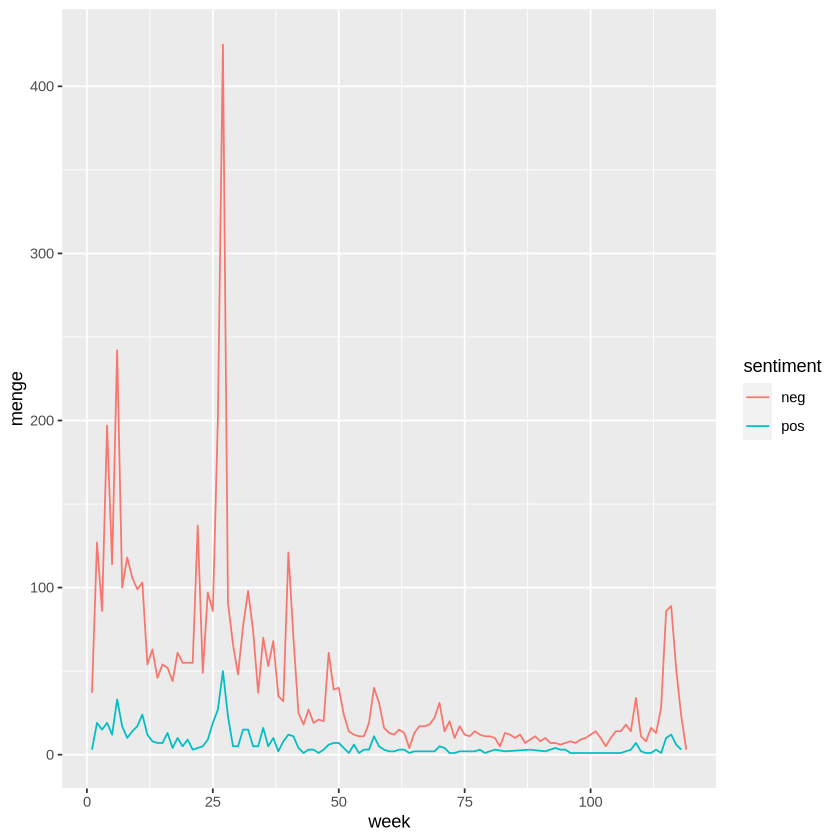

In [11]:
ethereum_comment_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    mutate(date = as.Date(date)) %>%
    mutate(week = cut.Date(date, breaks = "1 week", labels = FALSE)) %>%
    group_by(week, sentiment) %>%
    summarise(menge = n())%>%
    ggplot(aes(x = week, y = menge)) + geom_line(aes(color=sentiment))

### Menge

In [12]:
ethereum_comment_sentiment %>%
    mutate(date = as.Date(date)) %>%
    group_by(week = cut(date, "week")) %>%
    summarise(menge = n()) -> ethereum_comment_menge_w

## Google Trends

In [13]:
ethereum_trends = read.csv2("./Data/GoogleTrends/ethereumTrends.csv", sep=",")
head(ethereum_trends)

Woche      Ethereum
1 2019-03-17 3       
2 2019-03-24 3       
3 2019-03-31 4       
4 2019-04-07 4       
5 2019-04-14 3       
6 2019-04-21 3

In [14]:
ethereum_trends %>%
    mutate(date = as.Date(Woche)) %>%
    filter(date >= "2021-01-01") %>%
    filter(date <= "2024-02-01") %>%
    mutate(trend = Ethereum / 100)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(trend = mean(trend)) -> ethereum_trends_w

## Ripple Preis

In [15]:
coin_history = read.csv2("./Data/coin_history.csv")
head(coin_history)

X coin    date         value        type      
1 1 Bitcoin 1.613693e+12 9.639114e+11 market_cap
2 2 Bitcoin 1.613779e+12 1.044190e+12 market_cap
3 3 Bitcoin 1.613866e+12 1.050556e+12 market_cap
4 4 Bitcoin 1.613952e+12 1.075380e+12 market_cap
5 5 Bitcoin 1.614038e+12 1.012092e+12 market_cap
6 6 Bitcoin 1.614125e+12 9.041338e+11 market_cap

In [16]:
coin_history %>%
    mutate(date = as.Date(as.POSIXct(date/ 1000, origin="1970-01-01"))) %>%
    filter(type == "prices") %>% 
    filter(date >= "2021-12-01") %>%
    filter(date <= "2024-02-01") %>%
    filter(coin == "Ethereum")%>%
    group_by(week = cut(date, "week")) %>%
    summarise(open = first(value), close = last(value)) %>%
    mutate(return.p = ((close - lag(close)) / lag(close)) * 100)%>%
    mutate(return = close - lag(close)) %>%
    mutate(week = as.Date(week)) %>%
    filter(week >= "2021-12-27") -> ethereum_history_w

## Regression

In [17]:
ethereum = merge(x=ethereum_history_w, y=ethereum_news_sentiment_w, dy="week")
ethereum = ethereum %>% mutate(news_sentiment = sentiment) %>% select(-sentiment)
ethereum = merge(x=ethereum, y=ethereum_comment_sentiment_w, dy="week")
ethereum = ethereum %>% mutate(sm_sentiment = sentiment) %>% select(-sentiment)
ethereum = merge(x=ethereum, y=ethereum_trends_w, dy="week")
ethereum = merge(x=ethereum, y=ethereum_news_menge_w, dy="week")
ethereum = ethereum %>% mutate(news_menge = menge) %>% select(-menge)
ethereum = merge(x=ethereum, y=ethereum_comment_menge_w, dy="week")
ethereum = ethereum %>% mutate(sm_menge = menge) %>% select(-menge)

head(ethereum)

week       open     close    return.p   return    news_sentiment sm_sentiment
1 2021-12-27 4075.032 3780.316  -8.034308 -330.2560 0.2700000      -0.07702970 
2 2022-01-03 3835.396 3101.041 -17.968736 -679.2750 0.0950000      -0.15870370 
3 2022-01-10 3156.967 3331.247   7.423499  230.2058 0.1481250      -0.13698413 
4 2022-01-17 3356.295 2407.378 -27.733425 -923.8688 0.1860000      -0.12218182 
5 2022-01-24 2537.837 2603.604   8.151027  196.2260 0.1369231      -0.04068376 
6 2022-01-31 2610.182 3018.673  15.942115  415.0695 0.1692308      -0.08312500 
  trend news_menge sm_menge
1 0.41   3         101     
2 0.38  14         216     
3 0.37  16         126     
4 0.43  20         275     
5 0.37  13         117     
6 0.34  13         128

In [18]:
write.csv2(ethereum, "./Data/CoinTables/ethereumDaten.csv", row.names = FALSE)